# Visualizing Geospatial Data
inspired from scipy2018-geospatial

## goals of the tutorial
- plot a map with matplotlib
- choropleth map (pysal - mapclassify)
- folium

**based on the open data of:**
- [ISTAT](https://www.istat.it/it/archivio/222527) Italian National Institute of Statistic 


### requirements
- python knowledge
- pandas

### status 
*"the map is not the territory"*

---

In [ ]:
try:
  import rtree
except ModuleNotFoundError as e:
  !apt-get install libspatialindex-dev
  !pip install rtree
  import rtree

In [ ]:
try:
  import pysal as pi
except ModuleNotFoundError as e:
  !pip install pysal
  import pysal as pi

In [ ]:
try:
  import folium
except ModuleNotFoundError as e:
  !pip install folium
  import folium

In [ ]:
try:
  import geopandas as gpd
except ModuleNotFoundError as e:
  !pip install geopandas
  import geopandas as gpd

In [ ]:
import os
import pandas as pd
import numpy as np
import requests, zipfile, io
from shapely.geometry import Point

## data setup
based on the previous tutorial

In [ ]:
libraries = pd.read_csv('https://github.com/napo/geospatial_bigdive/raw/master/data/territorio.zip', compression='zip', sep=';')

In [ ]:
libraries.latitudine = pd.to_numeric(libraries.latitudine.str.replace(",","."))
libraries.longitudine = pd.to_numeric(libraries.longitudine.str.replace(",","."))

In [ ]:
# we need shapely to create the Point geometry
from shapely.geometry import Point

In [ ]:
libraries = gpd.GeoDataFrame(
    libraries.drop(['longitudine', 'latitudine'], axis=1),
    crs={'init': 'epsg:4326'},
    geometry=[Point(xy) for xy in zip(libraries.longitudine, libraries.latitudine)])

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [ ]:
if not os.path.exists('Limiti01012020'):
    # download the data
    zip_file_url = 'http://www.istat.it/storage/cartografia/confini_amministrativi/generalizzati/Limiti01012020.zip'
    #request the file
    r = requests.get(zip_file_url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    #unzip the file
    z.extractall()
    # read the file

In [ ]:
italian_regions=gpd.read_file('Limiti01012020' + os.sep + 'Reg01012020' + os.sep + 'Reg01012020_WGS84.shp')
italian_regions = italian_regions.to_crs(epsg=3857)
#libraries = libraries.to_crs(epsg=3857)
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


# GeoPandas visualization functionality

**Basic plot**


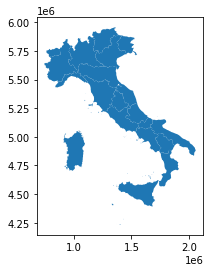

In [ ]:
italian_regions.plot()

**Coloring based on column values** 

In [ ]:
italian_regions.columns

Index(['COD_RIP', 'COD_REG', 'DEN_REG', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry'], dtype='object')

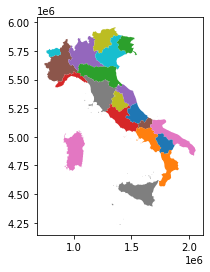

In [ ]:
italian_regions.plot(column='DEN_REG')

**Adjusting the figure size**


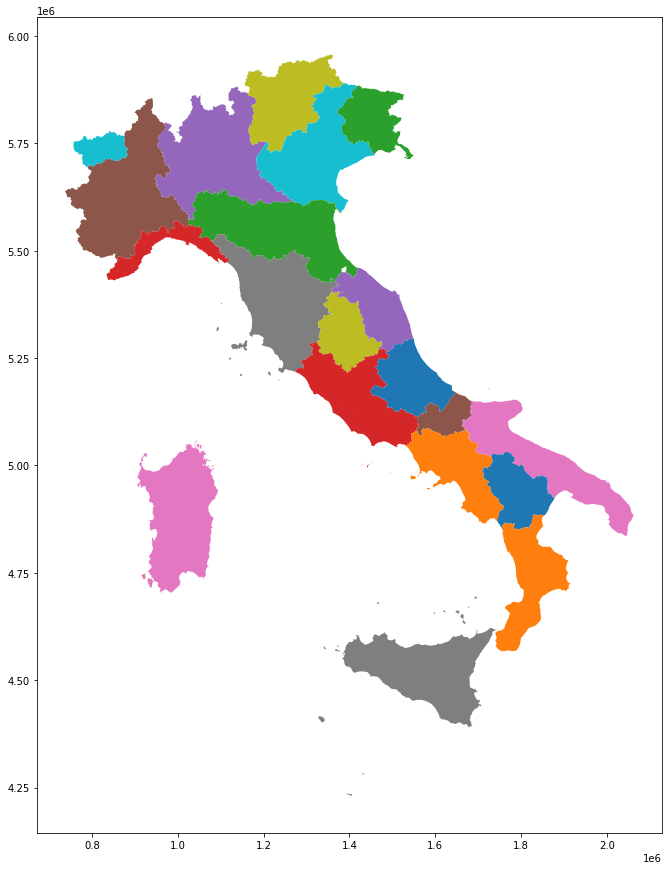

In [ ]:
italian_regions.plot(column='DEN_REG',figsize=(15, 15))

**Adding a legend**

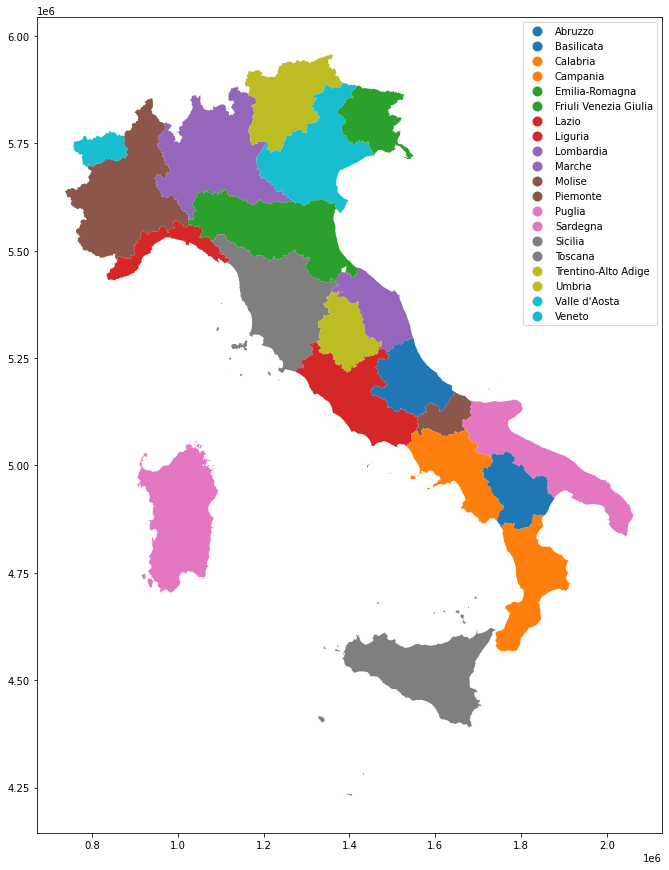

In [ ]:
italian_regions.plot(column='DEN_REG',legend=True,figsize=(15, 15))

**Removing the box / x and y coordinate label**

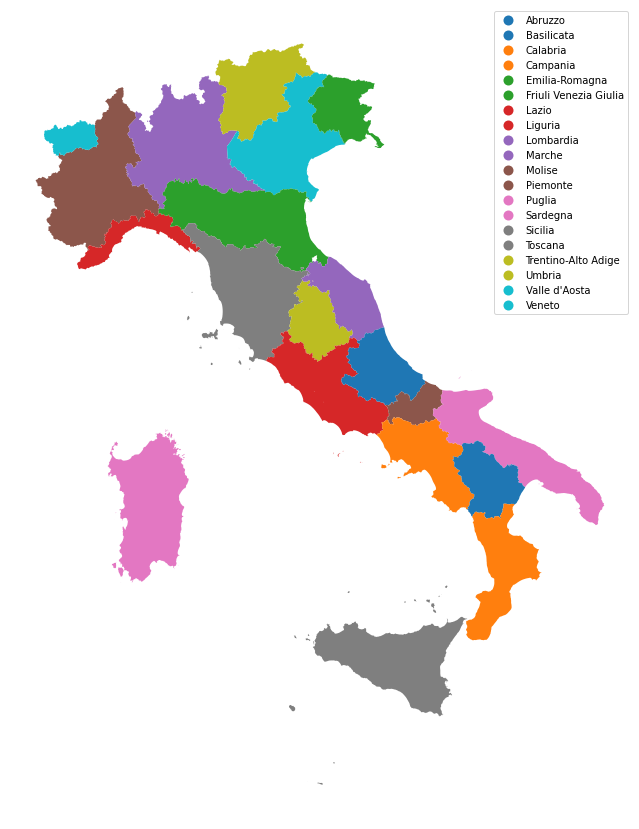

In [ ]:
ax = italian_regions.plot(column='DEN_REG',legend=True,figsize=(15, 15))
ax.set_axis_off()

**Change of the color scale**

the color scale can be chosen to make those offered by [maptplotlib](https://matplotlib.org/users/colormaps.html)

DEN_REG is a categorical variable that must highlight each region well without creating confusion, therefore it is suggested to [choose](https://matplotlib.org/users/colormaps.html#list-colormaps) a color scale from among those described as *divergent*

![](https://camo.githubusercontent.com/314c4f9be13d1fef2a6c30a03ee9135ac0e311d9/68747470733a2f2f6d6174706c6f746c69622e6f72672f5f696d616765732f677261797363616c655f30315f30332e706e67)

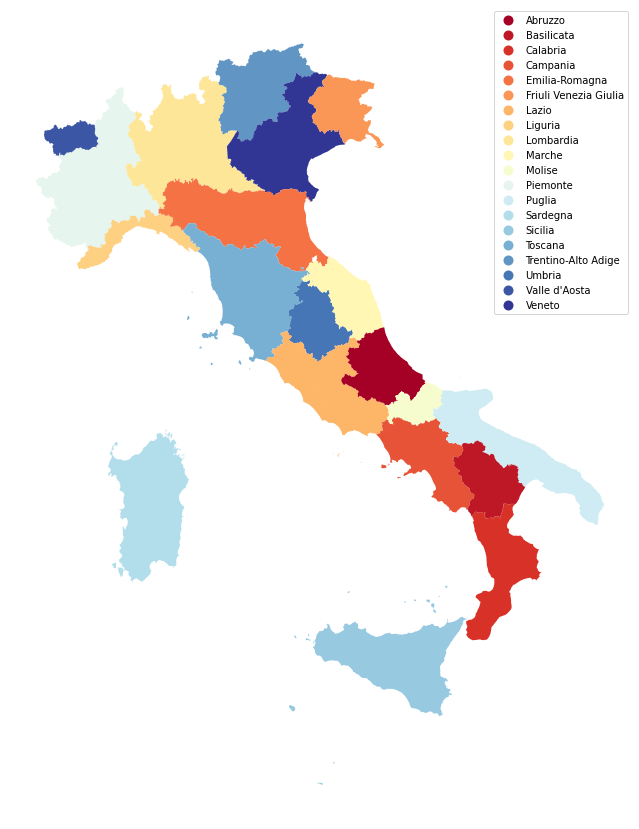

In [ ]:
ax = italian_regions.plot(column='DEN_REG',legend=True,figsize=(15, 15),cmap="RdYlBu")
ax.set_axis_off()

**highlight the edges**

Borders can be highlighted using the linewidth and edegecolor parameters

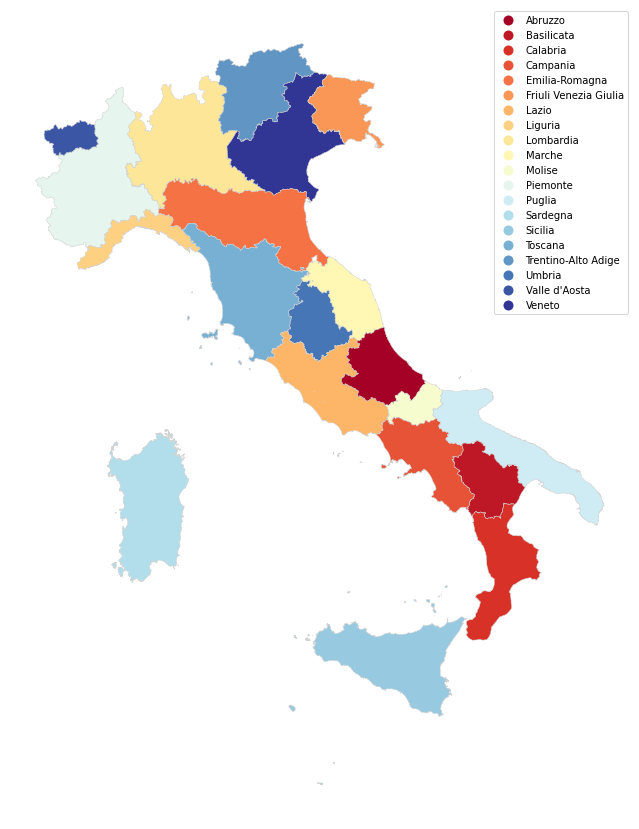

In [ ]:
ax = italian_regions.plot(column='DEN_REG',legend=True,figsize=(15, 15),cmap="RdYlBu", edgecolor = "lightgrey", linewidth = 0.5)
ax.set_axis_off()


**add labels to the map**

In [ ]:
italian_regions.representative_point()

0      POINT (870867.560 5664917.605)
1      POINT (820619.812 5736864.147)
2     POINT (1077904.065 5726969.108)
3     POINT (1249127.896 5842585.084)
4     POINT (1346267.707 5739357.178)
5     POINT (1452884.848 5799092.185)
6     POINT (1077857.246 5500754.785)
7     POINT (1241310.951 5533746.121)
8     POINT (1249000.235 5377046.330)
9     POINT (1383737.893 5311055.663)
10    POINT (1475385.296 5362600.647)
11    POINT (1390821.709 5164962.257)
12    POINT (1541879.407 5204748.578)
13    POINT (1628075.167 5118841.107)
14    POINT (1660211.957 4976021.160)
15    POINT (1871900.032 4994490.301)
16    POINT (1795446.427 4941868.031)
17    POINT (1851194.567 4727206.086)
18    POINT (1573754.106 4505855.266)
19    POINT (1013600.518 4876439.058)
dtype: geometry

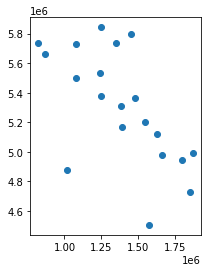

In [ ]:
italian_regions.representative_point().plot()

In [ ]:
representative_points = gpd.GeoDataFrame(italian_regions.representative_point()).reset_index()

In [ ]:
representative_points

,index,0
0,0,POINT (870867.560 5664917.605)
1,1,POINT (820619.812 5736864.147)
2,2,POINT (1077904.065 5726969.108)
3,3,POINT (1249127.896 5842585.084)
4,4,POINT (1346267.707 5739357.178)
5,5,POINT (1452884.848 5799092.185)
6,6,POINT (1077857.246 5500754.785)
7,7,POINT (1241310.951 5533746.121)
8,8,POINT (1249000.235 5377046.330)
9,9,POINT (1383737.893 5311055.663)


In [ ]:
representative_points = representative_points.rename(columns={0:'geometry'}).set_geometry('geometry')

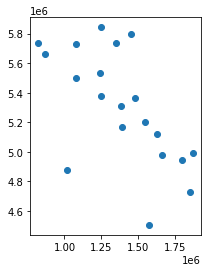

In [ ]:
representative_points.plot()

In [ ]:
labels = italian_regions.DEN_REG.to_frame().reset_index()

In [ ]:
representative_points = representative_points.merge(labels,on="index")

In [ ]:
representative_points = representative_points.rename(columns={'DEN_REG':'names'})

In [ ]:
representative_points

,index,geometry,names
0,0,POINT (870867.560 5664917.605),Piemonte
1,1,POINT (820619.812 5736864.147),Valle d'Aosta
2,2,POINT (1077904.065 5726969.108),Lombardia
3,3,POINT (1249127.896 5842585.084),Trentino-Alto Adige
4,4,POINT (1346267.707 5739357.178),Veneto
5,5,POINT (1452884.848 5799092.185),Friuli Venezia Giulia
6,6,POINT (1077857.246 5500754.785),Liguria
7,7,POINT (1241310.951 5533746.121),Emilia-Romagna
8,8,POINT (1249000.235 5377046.330),Toscana
9,9,POINT (1383737.893 5311055.663),Umbria


In [ ]:
import matplotlib.pyplot as plt

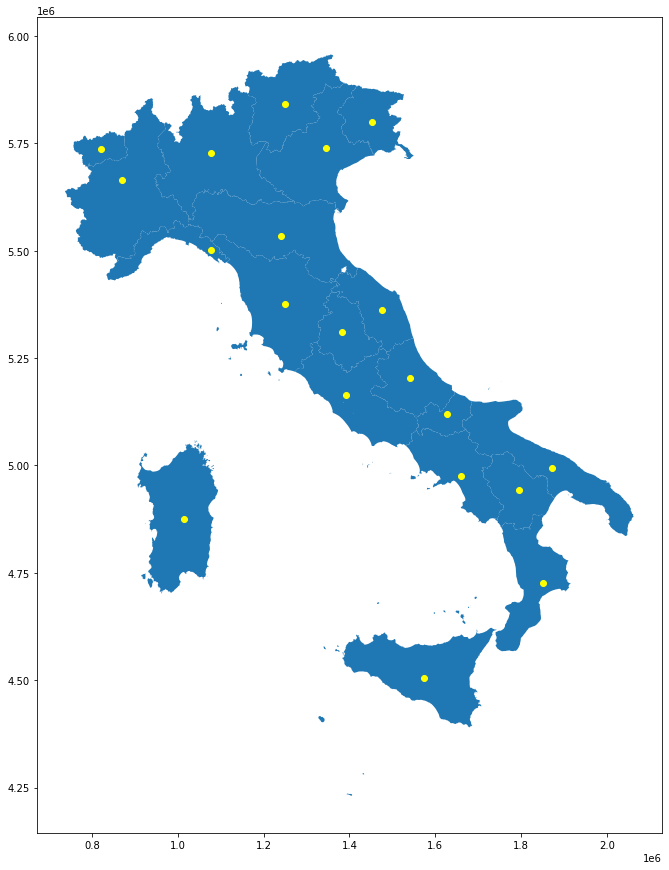

In [ ]:
f, canvas = plt.subplots(1,figsize = (15, 15))
italian_regions.plot(ax=canvas,figsize=(15,15))
representative_points.plot(ax=canvas,color='yellow')
plt.show()

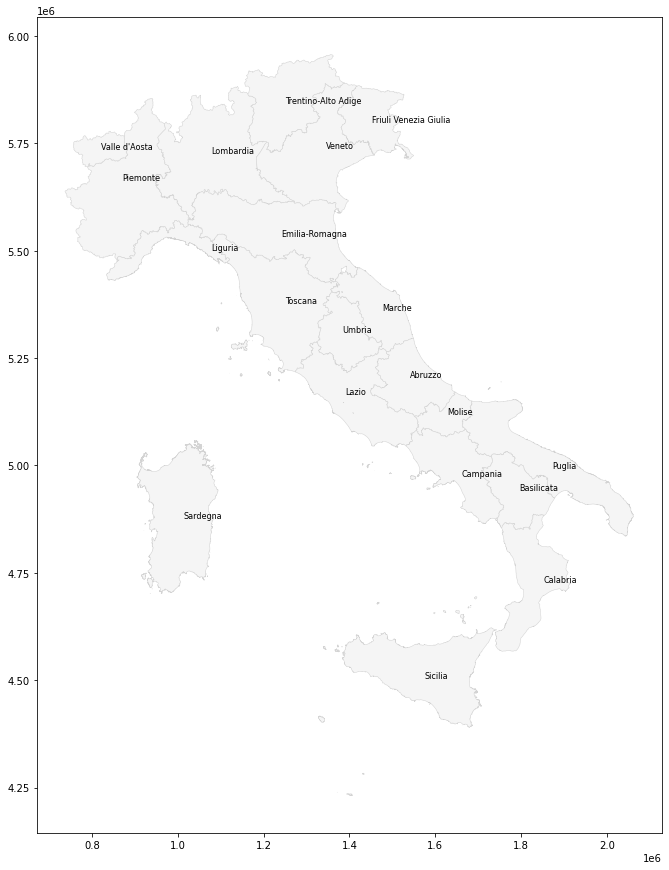

In [ ]:
texts = []
canvas = italian_regions.plot(figsize = (15, 15), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)

for x, y, label in zip(representative_points.geometry.x, representative_points.geometry.y, representative_points["names"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

# Chroloplet maps


... setup the data

In [ ]:
total_people_regions=pd.read_csv('https://raw.githubusercontent.com/napo/geospatial_bigdive/master/data/italian_population_regions.csv')

In [ ]:
total_people_regions.columns

Index(['Unnamed: 0', 'DEN_REG', 'Tipo di indicatore demografico', 'Value'], dtype='object')

In [ ]:
total_people_regions.head(5)

,Unnamed: 0,DEN_REG,Tipo di indicatore demografico,Value
0,0,Piemonte,popolazione al 1º gennaio,4375865
1,1,Valle d'Aosta,popolazione al 1º gennaio,126202
2,2,Liguria,popolazione al 1º gennaio,1556981
3,3,Lombardia,popolazione al 1º gennaio,10036258
4,4,Trentino-Alto Adige,popolazione al 1º gennaio,1067648


In [ ]:
total_people_regions.describe()

,Unnamed: 0,Value
count,20.00000,2.000000e+01
mean,9.50000,3.024199e+06
std,5.91608,2.534702e+06
min,0.00000,1.262020e+05
25%,4.75000,1.178566e+06
50%,9.50000,1.802432e+06
75%,14.25000,4.565731e+06
max,19.00000,1.003626e+07


In [ ]:
total_people_regions[total_people_regions.Value == total_people_regions.Value.min()][["DEN_REG","Value"]]

,DEN_REG,Value
1,Valle d'Aosta,126202


In [ ]:
total_people_regions[total_people_regions.Value == total_people_regions.Value.max()][["DEN_REG","Value"]]

,DEN_REG,Value
3,Lombardia,10036258


### .. now we can start with the choropleth maps :)

In [ ]:
geo_people_italian_regions = italian_regions.merge(total_people_regions,on="DEN_REG").reset_index()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


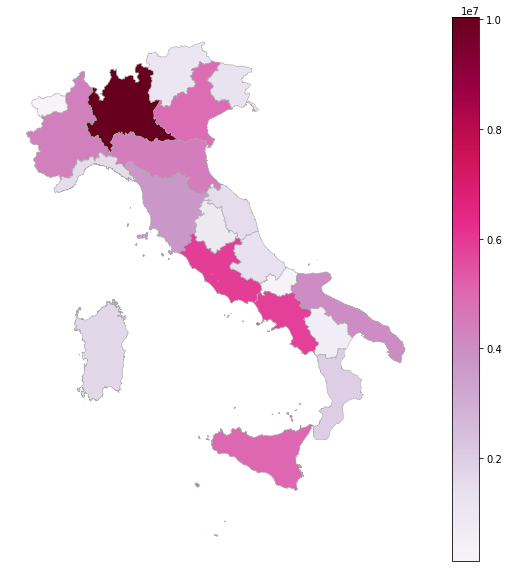

In [ ]:
ax = geo_people_italian_regions.plot(column='Value',cmap="PuRd", legend=True,edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))
ax.set_axis_off()
%time


<div class="alert alert-info" style="font-size:120%">
<b>REFERENCE</b>

mapclassify - a module of PySal - offers different function to create choroloplet maps
<ul>
    <li>An overview of all methods provided by Mapclassify can be found here: <a href="https://github.com/pysal/mapclassify"https://github.com/pysal/mapclassify</a></li>
</ul>

In [ ]:
import mapclassify

In [ ]:
quartilies=mapclassify.EqualInterval(geo_people_italian_regions.Value,k=4)

In [ ]:
quartilies

EqualInterval                     

         Interval            Count
----------------------------------
[  126202.00,  2603716.00] |    11
( 2603716.00,  5081230.00] |     6
( 5081230.00,  7558744.00] |     2
( 7558744.00, 10036258.00] |     1

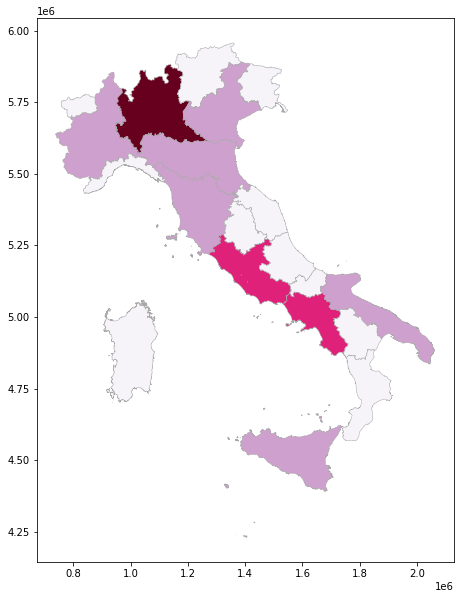

In [ ]:
geo_people_italian_regions.assign(cl=quartilies.yb).plot(column='cl',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

In [ ]:
quantiles=mapclassify.Quantiles(geo_people_italian_regions.Value)

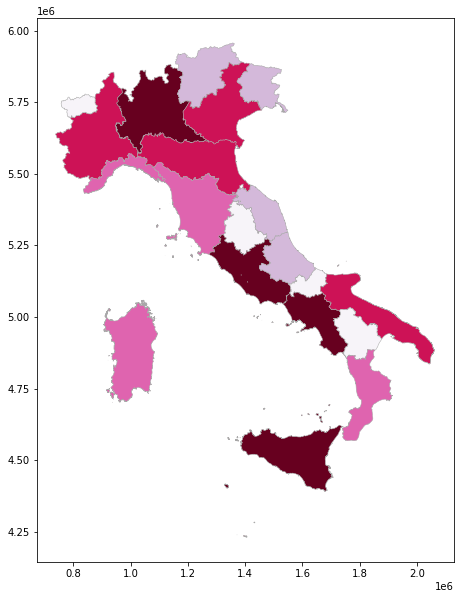

In [ ]:
geo_people_italian_regions.assign(cl=quantiles.yb).plot(column='cl',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

In [ ]:
geo_people_italian_regions.columns

Index(['index', 'COD_RIP', 'COD_REG', 'DEN_REG', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'Unnamed: 0', 'Tipo di indicatore demografico', 'Value'],
      dtype='object')

In [ ]:
percentile=mapclassify.Percentiles(geo_people_italian_regions.Value)

In [ ]:
percentile.bins

array([  160837.29      ,   541255.5       ,  1802431.5       ,
        5833843.3       ,  9249740.64999999, 10036258.        ])

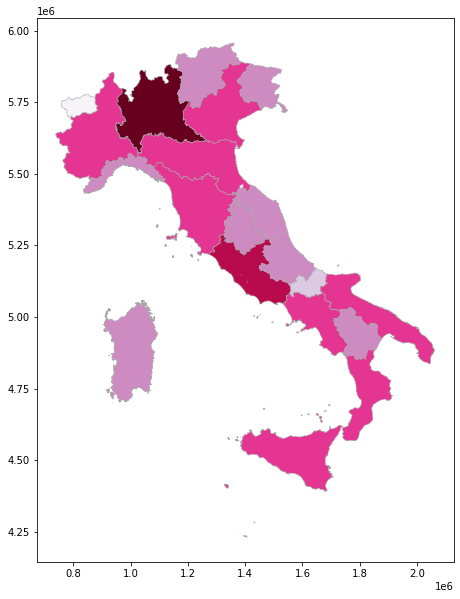

In [ ]:
geo_people_italian_regions.assign(cl=percentile.yb).plot(column='cl',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

<div class="alert alert-info" style="font-size:120%">
<b>Natural Breaks</b>
<p>
The Jenks optimization method, also called the Jenks natural breaks classification method, is a data clustering method designed to determine the best arrangement of values into different classes. 
</p><br/>
(source: <a href="https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization">https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization</a>)

In [ ]:
natural_breaks=mapclassify.NaturalBreaks(geo_people_italian_regions.Value)

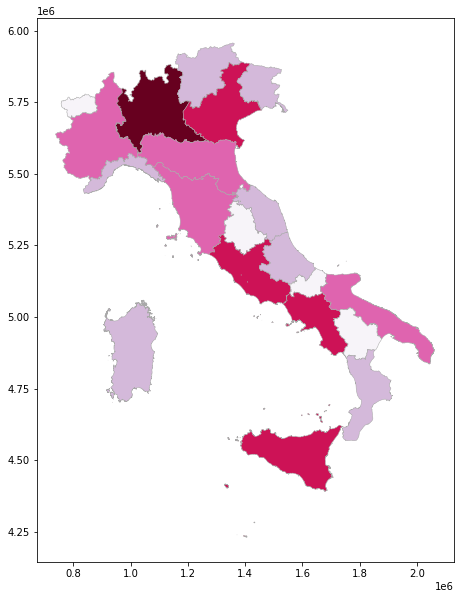

In [ ]:
geo_people_italian_regions.assign(cl=natural_breaks.yb).plot(column='cl',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

In [ ]:
natural_breaks.bins

array([  884640.,  1956687.,  4452629.,  5896693., 10036258.])

In [ ]:
fisher_jenks=mapclassify.FisherJenks(geo_people_italian_regions.Value)

In [ ]:
fisher_jenks.bins

array([  884640,  1956687,  4452629,  5896693, 10036258])

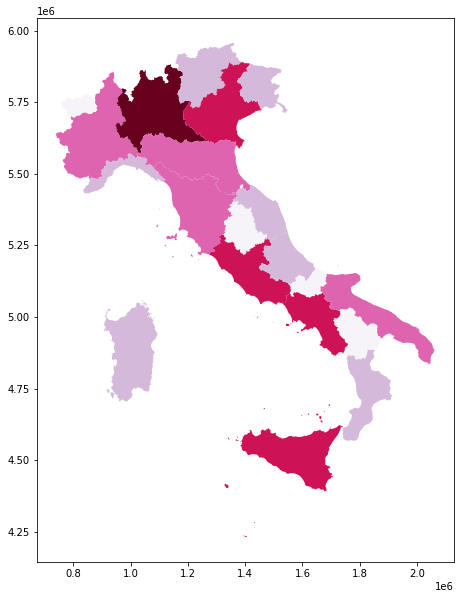

In [ ]:
geo_people_italian_regions.plot(linewidth = 0.5, figsize=(10,10),column='Value', cmap='PuRd', scheme='fisher_jenks');

# Folium

In [ ]:
import folium

In [ ]:
libraries_turin_wgs84 = libraries_turin.to_crs("epsg:4326")

In [ ]:
center_point_turin = libraries_turin_wgs84.unary_union.envelope.centroid

In [ ]:
map_turin = folium.Map([center_point_turin.y,center_point_turin.x], zoom_start=11, tiles="OpenStreetMap")
folium.GeoJson(libraries_turin_wgs84.to_json()).add_to(map_turin)
map_turin

In [ ]:
map_turin.save("turin.html")

In [ ]:
from google.colab import files
files.download("libraries_turin.geojson")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
libraries_turin_wgs84.to_file("libraries_turin.geojson",driver="GeoJSON")

##  heatmap with folium

In [ ]:
from folium.plugins import HeatMap

In [ ]:
heat_data = [[row['geometry'].y,row['geometry'].x] for index, row in libraries_turin_wgs84.iterrows()]

In [ ]:
map_torino = folium.Map(location=[center_point_turin.y, center_point_turin.x],
                    zoom_start = 12) 

In [ ]:
HeatMap(heat_data).add_to(map_torino)

In [ ]:
map_torino

---
# Exercise
- create an image map with the distribution of the number of people on the municipalities of an italian province  (tip: check http://demo.istat.it for the data)
- create a heatmap with folium with the libraries of an italian city
---